# Intro to Scikit Learn 

This is notebook for some useful function, testing, etc. Basically my sandbox
Mostly reviewing CPSC 340 materials 

0. End to end workflow on scikit-learn
1. Getting data ready
2. Chooising the right algo 
3. Fit model/algo  and make prediction
4. Evalu the model
5. Improve on a model
6. Save and train
7. Putting everything together

In [7]:
# getting data ready

import pandas as pd
import numpy as np
heart_disease = pd.read_csv("heart-disease.csv")
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [8]:
# create x (features matrix)

X = heart_disease.drop("target", axis=1)

# create y labels
y = heart_disease["target"]

In [9]:
# choosing the right model and hyperpara

from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [10]:
# 3 fit the model to the data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
clf.fit(X_train, y_train)

RandomForestClassifier()

In [12]:
# make prediction

y_label = clf.predict(np.array([0,2,3,4]))


ValueError: Expected 2D array, got 1D array instead:
array=[0. 2. 3. 4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [13]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
119,46,0,0,138,243,0,0,152,1,0.0,1,0,2
211,61,1,0,120,260,0,1,140,1,3.6,1,1,3
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,52,1,1,134,201,0,1,158,0,0.8,2,1,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
273,58,1,0,100,234,0,1,156,0,0.1,2,1,3
97,52,1,0,108,233,1,1,147,0,0.1,2,3,3


In [14]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [15]:
# 4 Evalu the mode on the training data and test data

clf.score(X_train, y_train)

1.0

In [16]:
clf.score(X_test, y_test)
# .8% accuracy 

0.819672131147541

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(classification_report(y_test, y_preds))

# compare test 

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        34
           1       0.75      0.89      0.81        27

    accuracy                           0.82        61
   macro avg       0.82      0.83      0.82        61
weighted avg       0.83      0.82      0.82        61



In [18]:
confusion_matrix(y_test, y_preds)


array([[26,  8],
       [ 3, 24]])

In [19]:
accuracy_score(y_test, y_preds)

0.819672131147541

In [20]:
# Improve a model 
# Try different amount of n_estimators

np.random.seed(99)
for i in range(10, 100, 10):
    print(f"Trying mode with {i} estimators...")
    clf = RandomForestClassifier(n_estimators=i).fit(X_train, y_train)
    print(f"Model on accuracy on test set: {clf.score(X_test, y_test) * 100:.2f}%")
    print('')

Trying mode with 10 estimators...
Model on accuracy on test set: 77.05%

Trying mode with 20 estimators...
Model on accuracy on test set: 83.61%

Trying mode with 30 estimators...
Model on accuracy on test set: 80.33%

Trying mode with 40 estimators...
Model on accuracy on test set: 85.25%

Trying mode with 50 estimators...
Model on accuracy on test set: 81.97%

Trying mode with 60 estimators...
Model on accuracy on test set: 81.97%

Trying mode with 70 estimators...
Model on accuracy on test set: 83.61%

Trying mode with 80 estimators...
Model on accuracy on test set: 78.69%

Trying mode with 90 estimators...
Model on accuracy on test set: 80.33%



In [21]:
# 6. save the model and load it

import pickle

pickle.dump(clf, open("random_forest_model_1.pkl", "wb"))

In [22]:
load_model = pickle.load(open("random_forest_model_1.pkl", "rb"))
load_model.score(X_test, y_test)

0.8032786885245902

In [23]:
import sklearn
sklearn.show_versions()


System:
    python: 3.8.5 (default, Sep  4 2020, 02:22:02)  [Clang 10.0.0 ]
executable: /opt/anaconda3/bin/python
   machine: macOS-10.15.7-x86_64-i386-64bit

Python dependencies:
          pip: 20.2.4
   setuptools: 50.3.1.post20201107
      sklearn: 0.23.2
        numpy: 1.19.2
        scipy: 1.5.2
       Cython: 0.29.21
       pandas: 1.1.3
   matplotlib: 3.3.2
       joblib: 0.17.0
threadpoolctl: 2.1.0

Built with OpenMP: True


## 1. Getting data ready to be used with Machine Learning

1. Split the data into features and labels 
2. Filling or disregarding missing value (clean up on csv)
3. Converting non numerical values to numerical value (feature encoding)



In [24]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [25]:
X = heart_disease.drop("target", axis=1)

In [26]:
y = heart_disease["target"]

In [27]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [28]:
# split data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [29]:
# split data into training and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [30]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((212, 13), (91, 13), (212,), (91,))

In [31]:
# 13 features / columns 
# 242 is from 303 samples and 80% is training so 303 x .8 = 242.4 
# Y has test set of 61, which is correct 242 + 61 = 303

## 1.1 make sure all car sales is numerical

In [32]:
car_sales = pd.read_csv("car-sales-extended.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [33]:
len(car_sales)

1000

In [34]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [35]:
# Split into X / y
X = car_sales.drop("Price", axis=1)
y = car_sales["Price"]

# Split into training and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [36]:
# Build marchine learning model
# Regression Model 
from sklearn.ensemble import RandomForestRegressor 

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

ValueError: could not convert string to float: 'Toyota'

In [39]:
# Turn the categories into numbers 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot, categorical_features)],
                               remainder="passthrough")

# covert into numbers
transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [40]:
X.head()

,Make,Colour,Odometer (KM),Doors
0,Honda,White,35431,4
1,BMW,Blue,192714,5
2,Honda,White,84714,4
3,Toyota,White,154365,4
4,Nissan,Blue,181577,3


In [41]:
## 12 is Odometer
# Make colours and door is someone between 0-11

pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [42]:
dummies = pd.get_dummies(car_sales[["Make", "Colour", "Doors"]])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [43]:
# Lets refit themodel

np.random.seed(42)
X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.3)
model.fit(X_train, y_train)
model.score(X_test, y_test)

# Basically it sucks .27 is horrible 

0.2764722437560483

## 1.2 How to fix the missing valuess?

1.  fill them with some values
2. remove the same with missing data altogether


In [44]:

# import car sale missing data

car_sale_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sale_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [45]:
car_sale_missing.isna()
# is there any missing value 

,Make,Colour,Odometer (KM),Doors,Price
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
995,False,False,False,False,False
996,True,False,False,False,False
997,False,False,False,False,False
998,False,False,False,False,False


In [46]:
car_sale_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
X = car_sale_missing.drop("Price", axis=1)
y = car_sale_missing["Price"]

In [48]:
# Lets try to convert our data to number 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot, categorical_features)],
                               remainder="passthrough")

# covert into numbers
transformed_X = transformer.fit_transform(X)
transformed_X

ValueError: Input contains NaN

In [54]:
car_sale_missing.tail()

,Make,Colour,Odometer (KM),Doors,Price
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0
999,Toyota,Blue,248360.0,4.0,12732.0


In [55]:
len(car_sale_missing)

1000

In [56]:
# Fill the "Make" column NaN with something

car_sale_missing["Make"].fillna("missing", inplace=True)

#Fill the colour column
car_sale_missing["Colour"].fillna("missing", inplace=True)

# fill the Odometer KM column
car_sale_missing["Odometer (KM)"].fillna(car_sale_missing["Odometer (KM)"].mean(), inplace=True)

# Fill the doors
car_sale_missing["Doors"].fillna(4, inplace=True)

In [57]:
car_sale_missing["Doors"].value_counts()
# average 4 doors

4.0    861
5.0     75
3.0     64
Name: Doors, dtype: int64

In [58]:
car_sale_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [59]:
car_sale_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [60]:
# Remove rows with missing price values

car_sale_missing.dropna(inplace=True)

In [61]:
car_sale_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [62]:
len(car_sale_missing)

950

In [63]:
X = car_sale_missing.drop("Price", axis=1)
y = car_sale_missing["Price"]

In [64]:
# Lets try to convert our data to number 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot, categorical_features)],
                               remainder="passthrough")

# covert into numbers
transformed_X = transformer.fit_transform(car_sale_missing)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        3.54310e+04, 1.53230e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        1.92714e+05, 1.99430e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        8.47140e+04, 2.83430e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        6.66040e+04, 3.15700e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.15883e+05, 4.00100e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.48360e+05, 1.27320e+04]])

## Second method of fill missing data using Scikit-Learn

In [65]:
car_sale_missing = pd.read_csv("car-sales-extended-missing-data.csv")
car_sale_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [66]:
car_sale_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [67]:
# remove from dataframe 
car_sale_missing.dropna(subset=["Price"], inplace=True)
car_sale_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [68]:
#Split into X and y

X = car_sale_missing.drop("Price", axis=1)
y = car_sale_missing["Price"]

In [69]:
# Fill missing value with ScikitLearn 

from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Fill categorical values with missing and numerical value with mean

cat_imputer = SimpleImputer(strategy="constant", fill_value="missing")
door_imputer = SimpleImputer(strategy="constant", fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

# define the column

cat_features = ["Make", "Colour"]
door_feature = ["Doors"]
num_features = ["Odometer (KM)"]

# Create an imputer (something that fills the missing data)
# this is the transformation occurs (takes a list and tuples)

imputer = ColumnTransformer([
    ("cat_imputer", cat_imputer, cat_features),
    ("door_imputer", door_imputer, door_feature),
    ("num_imputer", num_imputer, num_features)
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [70]:
car_sales_filled = pd.DataFrame(filled_X, columns=["Make", "Colour", "Doors", "Odometer (KM)"])
car_sales_filled.head()

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577


In [71]:
car_sales_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [72]:
# Lets try to convert our data to number 

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make", "Colour", "Doors"]
one_hot = OneHotEncoder()

transformer = ColumnTransformer([("one_hot",
                                 one_hot, categorical_features)],
                               remainder="passthrough")

# covert into numbers # pass car sales filled 
transformed_X = transformer.fit_transform(car_sales_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [73]:
# Now we've got our data as numbers and filled (no missing values)
# lets fil a model 

np.random.seed(99)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=.2)

model = RandomForestRegressor()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.11538315895283846

In [74]:
# Score is bad but it works. 
# Note to self, this clean up method is using sklearn build-in 

len(car_sales_filled), len(car_sales)

(950, 1000)

In [75]:
# 50 less sample drop score by A LOT and it was hard to find partterns. 
# Take away, clean data and lots of prep work.

## Choosing the right estimator / algo for our problem

Scikit Learn use estimator as another term for ML model or Algo

### 2.1 Picking a machine learning mode for a regression problem

In [176]:
# import boston housing data set

from sklearn.datasets import load_boston 
boston = load_boston()
boston;


In [77]:
# boston is dictioanry, now turn into dataframe

boston_df = pd.DataFrame(boston["data"], columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [78]:
len(boston_df)

506

In [79]:
# Use the scilearn cheat sheet to determine what model to use. 

# Lets use ridge regression model 

from sklearn.linear_model import Ridge
# Setup random seet

np.random.seed(99)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge Model
model = Ridge()

# Check the score of the Ridge model on test data
model.fit(X_train, y_train)
model.score(X_test, y_test)

#0.65 is not bad but can be improved

0.6585594318027416

In [80]:
# Use random forest (my fav)

from sklearn.ensemble import RandomForestRegressor

# use random seed 99
np.random.seed(99)

# Create the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Instantiate Ridge Model
rf = RandomForestRegressor(n_estimators=100)

# Check the score of the Ridge model on test data
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

# This model is clearly better!

0.8252043655979256

In [81]:
# Ridge score 
model.score(X_test, y_test)

0.6585594318027416

In [82]:
heart_disease

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [83]:
len(heart_disease)

303

In [84]:
# Import the LinearSVC etimate class 

from sklearn.svm import LinearSVC

# setup random seed

np.random.seed(99)

# make the data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instantiate LinearSVC

clf = LinearSVC(max_iter=100000)
clf.fit(X_test, y_test)

# Evalulate the LinearSVC score
clf.score(X_test, y_test)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


0.9016393442622951

In [85]:
# Import the RandomFores estimator class 

from sklearn.ensemble import RandomForestClassifier

# setup random seed

np.random.seed(99)

# make the data

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instantiate RandomFOrest

rfc = RandomForestClassifier(n_estimators=100)

# Check the score of the Ridge model on test data
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.8524590163934426

## Notes 

Tidbit:
1. if you have structure data, use ensemble methods
2. if you have unstructured data, use deep learning or transfer learning

## 3. Fit the model/algo on our data and use to make predict

* x = feature, feautre variable, data
* y = labels, target, target variable


In [86]:
from sklearn.ensemble import RandomForestClassifier


# setup random seed
np.random.seed(99)



In [87]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [88]:
y.tail()

298    0
299    0
300    0
301    0
302    0
Name: target, dtype: int64

### 3.2 make predictions using a machine learning model 

2 ways to make prediction

1. predict()
2. predict_proba()

In [89]:
# use a trained model to make predictions

clf.predict(np.array([1,2,3,4,5,6]))

ValueError: Expected 2D array, got 1D array instead:
array=[1 2 3 4 5 6].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [90]:
X_test.head()

# prediction needs to be in this shape 

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
137,62,1,1,128,208,1,0,140,0,0.0,2,0,2
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3
43,53,0,0,130,264,0,0,143,0,0.4,1,0,2
90,48,1,2,124,255,1,1,175,0,0.0,2,2,2
32,44,1,1,130,219,0,0,188,0,0.0,2,0,2


In [91]:
X_test.shape

(61, 13)

In [92]:
clf.predict(X_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1])

In [93]:
np.array(y_test)

array([1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1])

In [94]:
# Comapre predictions to truth labels to evalulate the model 

# Remember, y is the TRUTH 

y_preds = clf.predict(X_test)

# basically its comparing the two array and see if it did predict it correctly.
np.mean(y_preds == y_test)

0.9016393442622951

In [95]:
clf.score(X_test, y_test)
# same as above socre

0.9016393442622951

In [96]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_preds)

0.9016393442622951

# Make predictions with predict_proba()


In [97]:
# Predict_proba return probabilities of a classification label
clf.predict_proba(X_test[:5])

AttributeError: 'LinearSVC' object has no attribute 'predict_proba'

In [98]:
clf.predict(X_test[:5])

array([1, 0, 1, 1, 1])

### Note: So instead of return 1, 0, it shows the proability 

### Use predict() for regression models

In [99]:
# Import the RandomForest Regressor class 
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(99)

# make the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instantiate RandomFOrestRegressor
rfc = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

# Make predictions
y_preds = model.predict(X_test)

In [100]:
y_preds[:10]

array([34.13206259, 34.72773759, 25.3959133 , 24.36379627, 34.76053791,
       19.84220506, -1.36909749, 16.3983325 , 20.01102328, 18.71600734])

In [101]:
np.array(y_test[:10])

array([35.4, 35.2, 24.8, 22.6, 34.9, 20. , 13.8, 19.4, 20.4, 20. ])

In [102]:
# Compare the predictions to the truth

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_preds)

3.678681750869903

In [103]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [104]:
# On average, it predicts 3.67 away from the target

## 4. Evaluating a ML model

3 ways to eval sciitlearn model / estimators

1. esitmator "score" method
2. the scroing paramter
3. problem specific matrix function

### 4.1 Evaluating a mode with a score method 

In [105]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(99)

# make the data
X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

# split the data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instantiate RandomFOrest
rfc = RandomForestClassifier(n_estimators=100)

# Check the score of the Random Forest model on test data (Training machine learning model)
rfc.fit(X_train, y_train)


RandomForestClassifier()

In [106]:
rfc.score(X_train, y_train)
# returns the mean accuracy 
# 1 is TOO perfect and should be some red flag 

1.0

In [107]:
rfc.score(X_test, y_test)

0.8524590163934426

In [108]:
# Lets do the same but for regression 

In [109]:
# Import the RandomForest Regressor class 
from sklearn.ensemble import RandomForestRegressor

# setup random seed
np.random.seed(99)

# make the data
X = boston_df.drop("target", axis=1)
y = boston_df["target"]

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# Instantiate RandomFOrestRegressor
rfc = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)

# Get the score
rfc.score(X_test, y_test)

0.8252043655979256

In [110]:
# So in regression, the score is R^2, different than score from Classifier Score

In [111]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

cross_val_score(rfc, X_test, y_test, cv=5)

array([0.83405905, 0.70318006, 0.78038812, 0.75514094, 0.76096654])

In [112]:
# this cross validation score pretty much means split the data into chunks and get a score. 
# Cross is prefer because its more accurate and it trains on all the data instead of just .20 split and .8 train % of it
# Prevents lucky high score.  
cross_val_score(rfc, X_test, y_test, cv=10)


array([0.87117151, 0.82819514, 0.79563405, 0.76640797, 0.50618405,
       0.8957991 , 0.88048411, 0.60259478, 0.93043309, 0.31611419])

In [113]:
# Another Random Test on Cross Val Score

np.random.seed(99)

rfc_single_score = rfc.score(X_test, y_test)
rfc_cross_val_score = np.mean(cross_val_score(rfc, X, y, cv=5))
rfc_single_score, rfc_cross_val_score

(0.8252043655979256, 0.6239609759584595)

In [114]:
# Scroing paramter set to None by default

cross_val_score(rfc, X, y, cv=5, scoring=None)

array([0.77061251, 0.856968  , 0.73285833, 0.46447682, 0.31623059])

### 4.2.1 Classificiation model and evaluation metrics

1. accuracy
2. area under roc curve
3. confusion matrix
4. classification report

In [115]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(99)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()
cross_val_score = cross_val_score(clf, X, y, cv=5)
cross_val_score

array([0.81967213, 0.8852459 , 0.78688525, 0.81666667, 0.78333333])

In [116]:
np.mean(cross_val_score)

0.8183606557377049

In [117]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [118]:
print(f"Heart Disease Classifer Cross Validated Accuracy: {np.mean(cross_val_score) * 100:.2f}%")

Heart Disease Classifer Cross Validated Accuracy: 81.84%


In [119]:
# basically its saying 81.84% the model will predict the right label given the data on heart disease. 

** Area under the reciver operating characteristic curve (AUC / ROC) **

* Area under durve AUC
* ROC Curve

ROC curves are a comparison of a model's ture postive rate (tpr) verus a model faluse positive rate (fpr)

* true positive = model predicts 1 when truth is 1
* false positive = model predicts 1 when truth is 0
* true negative = model predicts 0 when truth is 0
* false negative = model predits 0 when truth is 1

* basically baby statistic type 1 and type 2 error 

In [120]:
# Create X_test .... 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [121]:
from sklearn.metrics import roc_curve

# fit the classifer
clf.fit(X_train, y_train)

# make prediction with probabilities 
y_probs = clf.predict_proba(X_test)
y_probs[:10], len(y_probs)

(array([[0.18, 0.82],
        [0.1 , 0.9 ],
        [0.  , 1.  ],
        [0.74, 0.26],
        [0.79, 0.21],
        [0.14, 0.86],
        [0.14, 0.86],
        [0.17, 0.83],
        [0.05, 0.95],
        [0.21, 0.79]]),
 61)

In [122]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.82, 0.9 , 1.  , 0.26, 0.21, 0.86, 0.86, 0.83, 0.95, 0.79])

In [123]:
# Calculate fpr, tpr and thresholds

fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

# check the false positive rate

fpr

# Need to plot those on a graph



array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03333333, 0.06666667, 0.06666667,
       0.1       , 0.13333333, 0.23333333, 0.23333333, 0.3       ,
       0.33333333, 0.36666667, 0.66666667, 0.73333333, 0.83333333,
       0.9       , 1.        ])

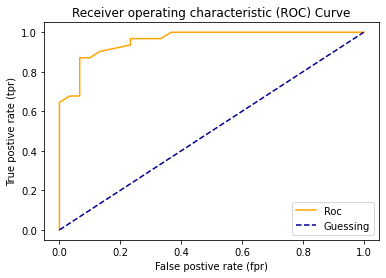

In [124]:
# Create a function for plotting ROC Curves 

import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    plot a roc curve given the falose positive rate (fpr) and ture positive rate 
    (tpr) of the model.
    """
    
    plt.plot(fpr, tpr, color="orange", label="Roc")
    # plot line with no predictive power(baseline)
    plt.plot([0,1], [0,1], color="darkblue", linestyle="--", label="Guessing")
    
    # customize the plot
    plt.xlabel("False postive rate (fpr)")
    plt.ylabel("True postive rate (tpr)")
    plt.title("Receiver operating characteristic (ROC) Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr, tpr)

# The area under the curve is important 


In [125]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9580645161290322

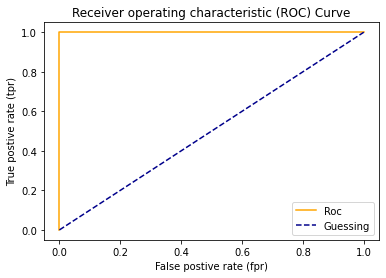

In [126]:
# Plot perfect roc curve and AUC score

fpr, tpr, thresholds = roc_curve(y_test, y_test)
plot_roc_curve(fpr, tpr)

# THIS is PERFECT score which is unrealistic

** Confusion Matrix **

a confusion matrix is a quikc way to compare the labels a model predicts and the actual labels it was suppsoed to predict 

In essence, giving you an idea of where the model is getting confused. 



In [127]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)


#Comparing the true labels with the perdictions and giving insights on the comparison
confusion_matrix(y_test, y_preds)

array([[27,  3],
       [ 4, 27]])

In [128]:
# Visualize confusiong matrix with pd.crosstab()

pd.crosstab(y_test, 
           y_preds, 
           rownames=["Actual Label"],
           colnames=["Predicted Labels"])

Predicted Labels,0,1
Actual Label,,
0,27,3
1,4,27


In [129]:
# 3, 4 is when the model is confused
# 27, 27 is when the model got it right
# 3 faluse negative
# 4 false postive 

In [130]:
len(X_test)

61

In [131]:
27 + 27 + 3 + 4

61

In [132]:
len(y_test)

61

In [137]:
#Seaborn is not in the enviornments but need to install, go back to console 
# this is how to install new env after everything is config
# import sys to access system

import sys

# tell jupyter to run a command using "!""
!conda install --yes --prefix {sys.prefix} seaborn

Solving environment: done

# All requested packages already installed.



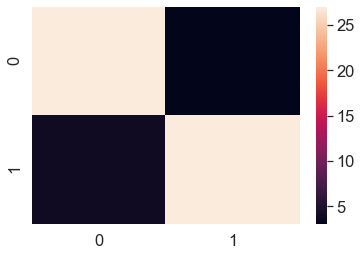

In [141]:
# Use seaborn visualization to see confusion matrix

import seaborn as sns

# set font scale

sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

# Plot it using seaborn

sns.heatmap(conf_mat);

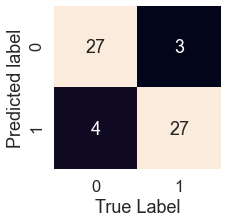

In [146]:
# No number, need to fix plot 

def plot_conf_mat(conf_mat):
    """
    plot a confusiong matrix using seaborn's heatmap()
    """
    
    fig, ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(conf_mat,
                    annot=True,
                    cbar=False)
    plt.xlabel("True Label")
    plt.ylabel("Predicted label");
    
    # matplotlib 3.1.1 will have issue, need to use 3.1.1 or higher
    
plot_conf_mat(conf_mat);

# visualize confusion matrix

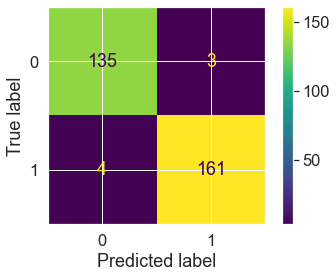

In [153]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf, X, y);

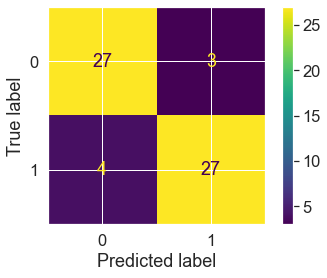

In [155]:
plot_confusion_matrix(clf, X_test, y_test);

# this method also works without using heatmap from seaborn 

### Classification report

In [159]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.89        30
           1       0.90      0.87      0.89        31

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [160]:
# accuracy : lower bound = 0, upper = 1
# macro avg : good if you have class imblanace, our example is good so its high  

In [165]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # only one positive case

disease_preds = np.zeros(10000) # model preicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                  disease_preds,
                                  output_dict=True))

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


In [166]:
# Example of massive class imbalance 

# accuracy .99% .... is this useful?
# there is 0 precision on class 1, which is not useful

### 4.2.2 Regression Model Evaluation Metrics

model evaluation metrics docs https://scikit-learn.org/stable/modules/model_evaluation.html

1. r^2 or cofficient of determination
2. mean absolute error (MAE)
3. mean ssquare error (MSE)

R^2 from statistic or econometrics 

** R^2 **

What R square does: compares your model predictions to the mean of the targets. Value can range from negative infinity (a very poor model) to 1. For example, if all your model does is predict the mean of the targets, it's R2 value would be 0. And if your model perfectly predicts a range of numbers its R^2 value would be 1

In [195]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target", axis=1)
y = boston_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)

model.fit(X_train, y_train);

In [196]:
model.score(X_test, y_test)

0.8654448653350507

In [201]:
from sklearn.metrics import r2_score

# Fill an array with y_tset mean

y_test_mean = np.full(len(y_test), y_test.mean())
y_test_mean

array([21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48823529,
       21.48823529, 21.48823529, 21.48823529, 21.48823529, 21.48

In [198]:
y_test.mean()

21.488235294117654

In [202]:
r2_score(y_test, y_test_mean) 

2.220446049250313e-16

In [200]:
r2_score(y_test, y_test)

1.0

### Mean Asbolte Error (MAE)

Mae is the average of the aboslute differences between predictions and actual values. It gives you an idea of how wrong models preodctions are. 

In [203]:
# mean abs error

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test, y_preds)
mae

# on average the model is + or - 2.13 from the actual value 

2.136382352941176

In [206]:
df = pd.DataFrame(data={"actual values": y_test,
                       "predicted values": y_preds})

# another columns to see the delta 
df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.081,-0.519
274,32.4,30.574,-1.826
491,13.6,16.759,3.159
72,22.8,23.460,0.660
452,16.1,16.893,0.793
...,...,...,...
412,17.9,13.159,-4.741
436,9.6,12.476,2.876
411,17.2,13.612,-3.588
86,22.5,20.205,-2.295


### Mean Squared Error 

In [209]:
from sklearn.metrics import mean_squared_error

#predict on x test data
y_preds = model.predict(X_test)
#compare with y
mse = mean_squared_error(y_test, y_preds)
mse

9.867437068627442

In [210]:
# Calculate MSE manually

squared = np.square(df["differences"])
squared.mean()

9.867437068627439

In [212]:
# basically with most regression model, you want to min function on mse and mae and max function on r^2

### 4.2.3 Understanding the scoring paramter

In [213]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(99)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

clf = RandomForestClassifier()

In [216]:
np.random.seed(99)

cv_acc = cross_val_score(clf, X, y, cv=5, scoring=None)
cv_acc

array([0.81967213, 0.8852459 , 0.78688525, 0.81666667, 0.78333333])

In [217]:
# Cross Validate Accuracy

print(f'the cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%')

the cross-validated accuracy is: 81.84%


In [219]:
np.random.seed(99)
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
print(f'the cross-validated accuracy is: {np.mean(cv_acc) * 100:.2f}%')

# produce the same results because when scoring is none, its just "accuracy"

the cross-validated accuracy is: 81.84%


In [220]:
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
np.mean(cv_precision)

0.8321783592751334

In [221]:
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
np.mean(cv_recall)

0.8606060606060606

In [222]:
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
np.mean(cv_f1)

0.8285636098445156

### How about our regression model?

In [223]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(99)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

model = RandomForestRegressor(n_estimators=100)



In [234]:
np.random.seed(99)

cv_r2 = cross_val_score(model, X, y, cv=5, scoring=None)
np.mean(cv_r2)

0.06272950904392767

In [235]:
np.random.seed(99)
cv_r2 = cross_val_score(model, X, y, cv=5, scoring="r2")
cv_r2

array([0.        , 0.        , 0.31364755, 0.        , 0.        ])

In [236]:
# Mean Abs Error

np.random.seed(99)

cv_mae = cross_val_score(model, X, y, cv=5, scoring="neg_mean_absolute_error")
cv_mae

array([-0.32590164, -0.36540984, -0.25245902, -0.30466667, -0.44016667])

In [237]:
# Mean Squared Error

np.random.seed(99)
cv_mse = cross_val_score(model, X, y, cv=5, scoring="neg_mean_squared_error")
np.mean(cv_mse)

-0.19270225683060108

## 4.3 Using diff evalutioon metrics as scikitlearn functions



In [241]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(99)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

# make some predictions

y_preds = clf.predict(X_test)

# Evaluate the classifer

print("Classifer metrics on the test set")
print(f'Accuracy: {accuracy_score(y_test, y_preds)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_preds)}')
print(f'Recall: {recall_score(y_test, y_preds)}')
print(f'F1: {f1_score(y_test, y_preds)}')


classifer metrics on the test set
Accuracy: 85.25%
Precision: 0.9142857142857143
Recall: 0.8421052631578947
F1: 0.8767123287671234


In [243]:
### Regression Evaluation functions


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(99)

X = heart_disease.drop("target", axis=1)
y = heart_disease["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestRegressor(n_estimators=100)
model.fit(X_train, y_train)

# make predictions using our regression model

model.predict(X_test)

# Evaluate the classifer

print("Regression model metrics on the test set")
print(f'R^2: {r2_score(y_test, y_preds)}')
print(f'MAE: {mean_absolute_error(y_test, y_preds)}')
print(f'MSE: {mean_squared_error(y_test, y_preds)}')

Regression model metrics on the test set
R^2: 0.37185354691075523
MAE: 0.14754098360655737
MSE: 0.14754098360655737


## 5 Improving a model 

First predictions = baseline prediciton. First model = baseline model

From the data perspective:
    
    * Could we collect more data? (generally, the more data, the better)
    * Could we improve our data?
    
From a model perspective

    * Is there a btter model we could use?
    * COuld we improve the current model.

Hyperparameters vs Parameters

    * Parameters = model find these patterns in data
    * Hyperparameters = setting on a model you can adjust to improve its ability to find patterns

Three ways to adjust hyperparameters

1. by band
2. randomly with randomserach cv
3. exhaustively with grindsearch cv

In [245]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)

clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

### 5.1 Hyperparamters Tuning by Hand

lets make 3 sets, training, validation and test set

### we are going try to adjust

 * max_depth
 * max_features
 * min_sample_leaf
 * min_sample_split
 * n_estimator

In [266]:
def evaluate_preds(y_true, y_preds):
    
    accuracy = accuracy_score(y_true, y_preds)
    precision = precision_score(y_true, y_preds)
    recall = recall_score(y_true, y_preds)
    f1 = f1_score(y_true, y_preds)
    metric_dict = {"accuracy": round(accuracy, 2),
                  "precision": round(precision, 2),
                  "recall": round(recall, 2),
                  "f1": round(f1, 2)}
    print(f"Accuracy: {accuracy * 100:.2f}%")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1 Score: {f1:.2f}")
    
    return metric_dict

In [267]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(99)

# shuffle the data

heart_disease_shuffled = heart_disease.sample(frac=1)

# split into X and y
X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

#Split the data into train, validation and test sets

train_split = round(0.7 * len(heart_disease_shuffled))
valid_split = round(train_split + 0.15 * len(heart_disease_shuffled)) # 15% of data
X_train, y_train = X[:train_split], y[:train_split]
X_valid, y_valid = X[train_split:valid_split], y[train_split:valid_split]
X_test, y_test = X[valid_split:], y[valid_split:]

# len(X_train), len(X_valid), len(X_test)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make baseline prediciton 
y_preds = clf.predict(X_valid)

# Evaluate the classifer on validation set
baseline_metrics = evaluate_preds(y_valid, y_preds)
baseline_metrics

Accuracy: 82.22%
Precision: 0.77
Recall: 0.96
F1 Score: 0.86


{'accuracy': 0.82, 'precision': 0.77, 'recall': 0.96, 'f1': 0.86}

In [273]:
# Create a second classifer with different hyperparameters

np.random.seed(99)

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train, y_train)

# make predictions 
y_preds_2 = clf_2.predict(X_valid)

# Evalute the 2nd classifer

clf_2_metrics = evaluate_preds(y_valid, y_preds_2)

Accuracy: 82.22%
Precision: 0.79
Recall: 0.92
F1 Score: 0.85


In [275]:
# Create a third classifer with different hyperparameters (max depth)

np.random.seed(99)

clf_3 = RandomForestClassifier(n_estimators=100, max_depth=100)
clf_3.fit(X_train, y_train)

# make predictions 
y_preds_3 = clf_3.predict(X_valid)

# Evalute the 2nd classifer

clf_3_metrics = evaluate_preds(y_valid, y_preds_3)

Accuracy: 82.22%
Precision: 0.79
Recall: 0.92
F1 Score: 0.85


In [257]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
# The take away, by hand is slow but you can do minor tweaks. It is slows so we should just use scikit-learn build
# in Randomized CV 

In [300]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

grid = {"n_estimators": [10,100,200,500,1000,1200],
       "max_depth": [None, 5, 10, 20, 30],
       "max_features": ["auto", "sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

np.random.seed(99)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate randomforestclassifer 
clf = RandomForestClassifier(n_jobs=-1)

# Setup Randomized Search CV
# Iterate over 10 times
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid,
                            n_iter=100,
                            cv=5, 
                            verbose=2)

# Fit the randomized search cv version of clf

rs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=10, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4

[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=20, total=   1.0s
[CV] n_estimators=100, min_samples_split=6,

[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=100, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   0.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=None, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samp

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=10, total=   0.3s
[CV] n_estimators=100, min_samples_split=2, min_samp

[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   1.5s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   1.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=4, max_features=auto, max_depth=None, total=   1.3s
[CV] n_estimators=100, mi

[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=5, total=   1.0s
[CV] n_estimators=10, min_samples_split=6, min_sampl

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.3s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=5, total=   0.2s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf

[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1200, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=20, total=   1.2s
[CV] n_estimators=1000, min_samples_split=4

[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.7s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20 
[CV]  n_estimators=500, min_samples_split=4, min_samples_leaf=4, max_features=auto, max_depth=20, total=   0.5s
[CV] n_estimators=500, min_samples_split=2, min_samp

[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=1, max_features=auto, max_depth=30, total=   0.2s
[CV] n_estimators=100, min_samples_split=6, min_samp

[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.0s
[CV] n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=10, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.0s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None 
[CV]  n_estimators=200, min_samples_split=6, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.2s
[CV] n_estimators=200, min_samples_spli

[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=1, max_features=sqrt, max_depth=None, total=   1.0s
[CV] n_estimators=100, mi

[CV]  n_estimators=500, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=None, total=   0.6s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.1s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20 
[CV]  n_estimators=1000, min_samples_split=4, min_samples_leaf=4, max_features=sqrt, max_depth=20, total=   1.0s
[CV] n_estimators=1000, min_samples_split=

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  4.6min finished


In [302]:
rs_clf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': None}

In [303]:
# Make predictions with the best hyperparamters

rs_y_preds = rs_clf.predict(X_test)

rs_metrics = evaluate_preds(y_test, rs_y_preds)

Accuracy: 86.89%
Precision: 0.82
Recall: 0.97
F1 Score: 0.89


### 5.3 Hyperparamter tuning using GridSearchCV



In [293]:
grid

{'n_estimators': [10, 100, 200, 500, 1000, 1200],
 'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_split': [2, 4, 6],
 'min_samples_leaf': [1, 2, 4]}

In [295]:
grid_2 = {"n_estimators": [100,200,500],
       "max_depth": [None],
       "max_features": ["auto", "sqrt"],
       "min_samples_split":[6],
       "min_samples_leaf":[1,2]}

In [297]:
# Basically this is BRUTE FORCE search and make every possible iteration

from sklearn.model_selection import GridSearchCV, train_test_split

np.random.seed(99)

X = heart_disease_shuffled.drop("target", axis=1)
y = heart_disease_shuffled["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# instantiate randomforestclassifer 
clf = RandomForestClassifier(n_jobs=-1)

# Setup Grid Search CV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid=grid_2,
                            cv=5, 
                            verbose=2)

# Fit the Grid Search CV version of clf

gs_clf.fit(X_train, y_train);

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   2.0s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.2s
[CV] max_depth=None, max_features=

[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=500, total=   0.5s
[CV] max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=100, total=   0.1s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:   20.2s finished


In [298]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 100}

In [299]:
gs_y_preds = gs_clf.predict(X_test)

# evaluate the predictions

gs_metrics = evaluate_preds(y_test, gs_y_preds)

Accuracy: 85.25%
Precision: 0.82
Recall: 0.94
F1 Score: 0.88


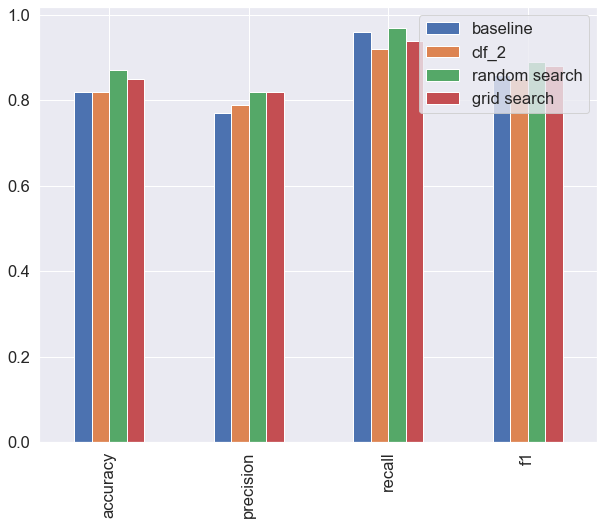

In [304]:
# Plot it and compare all the differnt hyperparamter tuning differnece 

compare_metrics = pd.DataFrame({"baseline": baseline_metrics,
                               "clf_2": clf_2_metrics,
                               "random search": rs_metrics,
                               "grid search": gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

In [306]:
import pickle

# save the model

pickle.dump(gs_clf, open("gs_random_random_forest_model_1.pkl", "wb"))

In [307]:
# load a save model

loaded_pickle_model = pickle.load(open("gs_random_random_forest_model_1.pkl", "rb"))

In [309]:
# make some predictions

pickle_y_preds = loaded_pickle_model.predict(X_test)
evaluate_preds(y_test, pickle_y_preds)

Accuracy: 85.25%
Precision: 0.82
Recall: 0.94
F1 Score: 0.88


{'accuracy': 0.85, 'precision': 0.82, 'recall': 0.94, 'f1': 0.88}